In [7]:
import pandas as pd
import numpy as np

df=pd.read_csv("MotorPremiums.csv")

df

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B61470950,62,M,UK,35,0,0,1400,4,0,12,211.76
4,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49
...,...,...,...,...,...,...,...,...,...,...,...,...
4382,A1126336,28,M,UK,8,0,3,1200,4,Garage,1,214.03
4383,B56077025,76,F,UK,41,0,4,1600,5,Road,1,265.50
4384,B30440487,50,M,UK,32,0,4,1200,2,Road,1,250.51
4385,A48556843,36,F,UK,12,8,3,1200,5,Road,1,264.92


In [12]:
df_cleaned = df.copy()

df_cleaned = df_cleaned[(df_cleaned.LicenceCountry=='UK')&(df_cleaned.Stored != '0')]

df_cleaned = df_cleaned.reset_index(drop=True)

selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age','Premium']

df_cleaned = df_cleaned[selected_features]

df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Female':'F', 'Male':'M'})

df_cleaned

,Age,Gender,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,52,M,16,0,0,1200,4,Garage,2,195.32
1,46,F,22,8,1,1400,2,Garage,7,225.09
2,59,F,9,0,0,1400,5,Garage,14,201.08
3,59,F,3,0,4,1400,5,Road,13,251.49
4,78,M,57,4,1,1800,3,Garage,1,229.46
...,...,...,...,...,...,...,...,...,...,...
4369,28,M,8,0,3,1200,4,Garage,1,214.03
4370,76,F,41,0,4,1600,5,Road,1,265.50
4371,50,M,32,0,4,1200,2,Road,1,250.51
4372,36,F,12,8,3,1200,5,Road,1,264.92


In [13]:
df_cleaned = pd.get_dummies(df_cleaned, prefix_sep='_', drop_first=True)

In [17]:
targetName='Premium'
featureNames = df_cleaned.columns[df_cleaned.columns!= targetName]

X = df_cleaned[featureNames].values
y = df_cleaned[targetName].values

In [22]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(10), alpha=0.001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.01, max_iter=1000, random_state=1)

mlp_model.fit(X_train, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.01,
             max_iter=1000, random_state=1)

19.850675397833722


Text(0, 0.5, 'Predicted values')

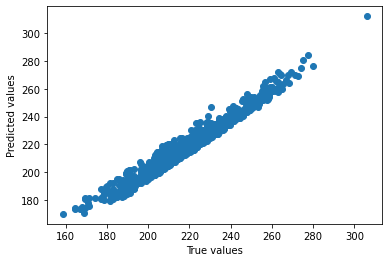

In [30]:
y_pred = mlp_model.predict(X_validation)

from sklearn import metrics

print(metrics.mean_squared_error(y_validation, y_pred))

from matplotlib import pyplot as plt
plt.scatter(y_validation, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import cross_val_score

scores=cross_val_score(mlp_model, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
print(scores)
print(scores.mean())

[-19.63625695 -21.0108921  -20.79687805 -19.71271997 -18.51489647]
-19.934328707123797
